In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('Resources/mlb_team_payroll.csv')
df_binary = df[['teampayroll', 'wins']] 
df_binary["teampayroll"] = df_binary["teampayroll"].astype(str).astype(float)
df_binary["wins"] = df_binary["wins"].astype(float)
x = df_binary.iloc[:,0]
y = df_binary.iloc[:,1]

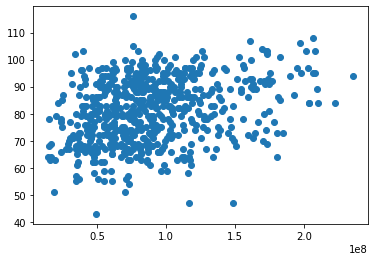

In [3]:
plt.scatter(x,y)
plt.show()

In [5]:
X = df_binary.teampayroll.values.reshape(-1, 1)
y = df_binary.wins.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (630, 1) (630, 1)


In [6]:
model = LinearRegression()

In [7]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[8.83759948e-08]]
y-axis intercept:  [73.09860117]


In [10]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[14650000.]]
Max X Value: [[2.35295219e+08]]


In [11]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

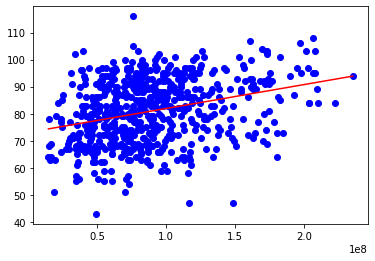

In [12]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 126.10336543958134
R-squared (R2 ): 0.0947074998953209


In [14]:
model.score(X, y)

0.0947074998953209

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.score(X_test, y_test)

0.09886511110436469